In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

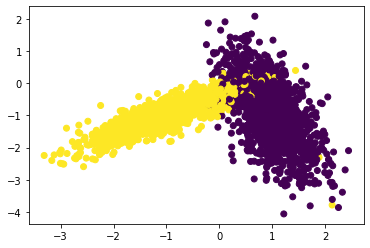

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [3]:
def RandomSearch(x_train, y_train, classifier, params, folds):
    trainscores, testscores = [], []
    for k in tqdm(params['k_neighbours']):
        trainscores_folds, testscores_folds = list(), list()
        for i in range(0, folds):
            # taking test indices first by using length of train data for ex: for first i = 0 it would take data from 5k to 7.5k
            test_indices = list(range(len(x_train) - (len(x_train) // folds) * (i + 1), len(x_train) - (len(x_train) // folds) * i))
            train_indices  = list(set(list(range(0, len(x_train)))) - set(test_indices))
            
            # Dividing test and train data using test and train indices
            X_train, Y_train, X_test, Y_test = x_train[train_indices], y_train[train_indices], x_train[test_indices], y_train[test_indices]
            # taking value of k and training the classifier using that.
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        
        # appending accuracy values to trainscores and testscores    
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores, testscores

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
import warnings
import numpy as np
warnings.filterwarnings('ignore')

neigh = KNeighborsClassifier()
param_range = (1, 50)
params = {'k_neighbours':np.random.uniform(param_range[0], param_range[1], 10).astype('int')}
folds = 3

trainscores, testscores = RandomSearch(X_train, y_train, neigh, params, folds)

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.00it/s]


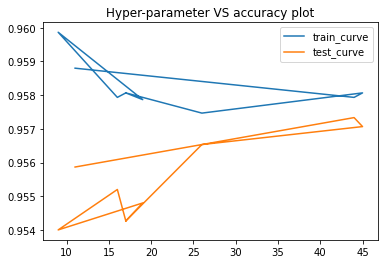

In [5]:
plt.plot(params['k_neighbours'], trainscores, label='train_curve')
plt.plot(params['k_neighbours'], testscores, label='test_curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()